CODE                0.000000
PRODUCTO            0.000000
TIPO_CARROCERIA     0.000000
COMBUSTIBLE         0.000000
Potencia_           0.000000
TRANS               0.000000
FORMA_PAGO          0.000000
ESTADO_CIVIL        1.533187
GENERO              1.481507
OcupaciOn           0.000000
PROVINCIA           0.000000
Campanna1           0.000000
Campanna2           0.000000
Campanna3           0.000000
Zona _Renta        22.701511
REV_Garantia        0.000000
Averia_grave        0.001723
QUEJA_CAC           0.000000
EDAD_COCHE          0.000000
COSTE_VENTA         0.000000
km_anno             0.000000
Mas_1_coche         0.000000
Revisiones          0.000000
Edad Cliente        0.000000
Tiempo              0.000000
dtype: float64


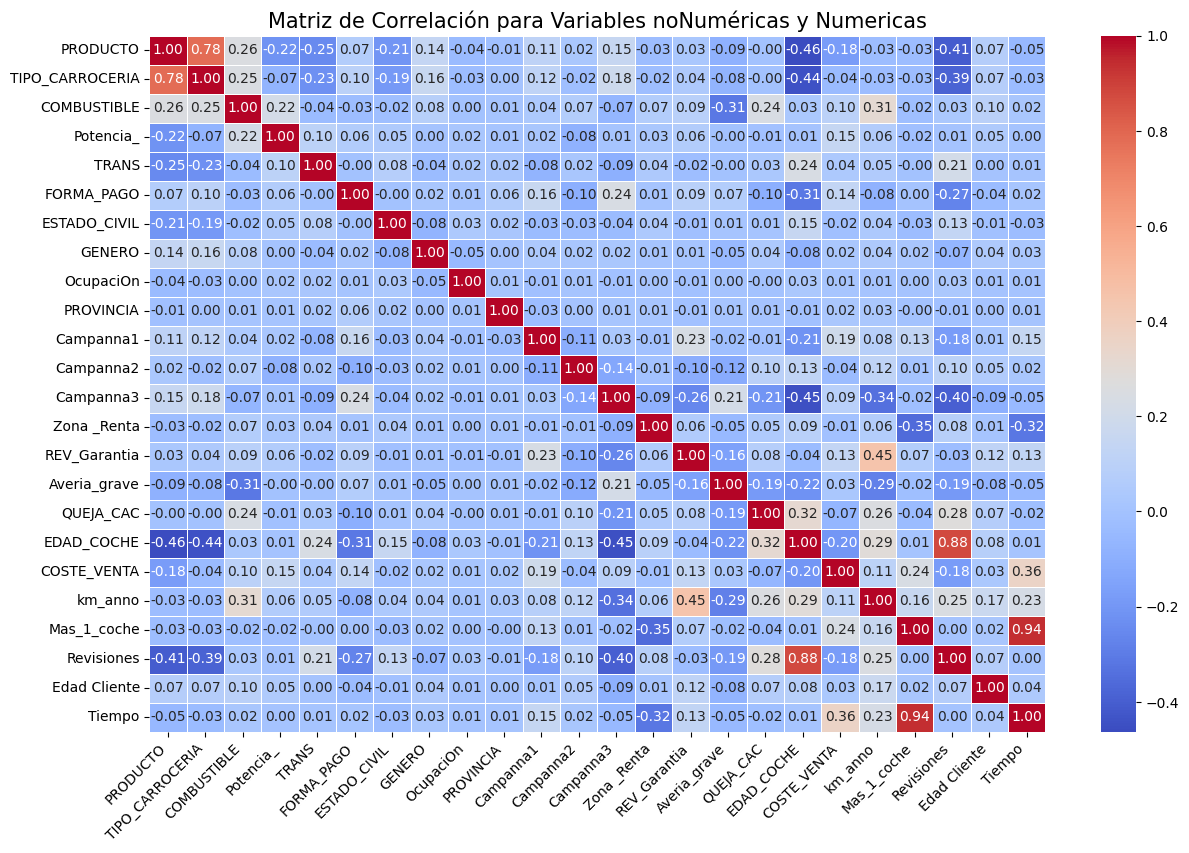

In [24]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Cargar el archivo CSV
df = pd.read_csv("cars.csv", delimiter=";")

# Ver el porcentaje de valores nulos por columna
porcentaje_nulos = df.isnull().mean() * 100
print(porcentaje_nulos)


# Sustituir los valores nulos de la columna 'Zona_Renta' por 'Desconocido'
df['Zona _Renta'] = df['Zona _Renta'].fillna('Desconocido')

df = df.dropna()


# Eliminar la columna "CODE" ya que no aporta al análisis
df = df.drop(columns=['CODE'])

# Crear una copia del DataFrame
df_numerico = df.copy()

# Inicializar el LabelEncoder
label_encoder = LabelEncoder()

# Iterar sobre las columnas que son de tipo object (categóricas)
for column in df_numerico.select_dtypes(include=['object']).columns:
    # Aplicar LabelEncoder a cada columna categórica
    df_numerico[column] = label_encoder.fit_transform(df_numerico[column])


# Calcular la correlación para las variables numéricas
corr = df_numerico.corr()

# Visualizar la correlación con un heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 12))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Rotar las etiquetas del eje X y Y para evitar que se sobrepongan
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)

# Ajustar los márgenes para que las etiquetas no se corten
plt.subplots_adjust(bottom=0.3, left=0.2)

# Mostrar el gráfico
plt.title('Matriz de Correlación para Variables noNuméricas y Numericas', size=15)
plt.show()


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar las características y la variable objetivo
X = df.drop(columns=['Mas_1_coche', 'EDAD_COCHE', 'Tiempo', 'TRANS', 'FORMA_PAGO', 'PROVINCIA', 'Revisiones', 'OcupaciOn', 'Potencia_'])
y = df['Mas_1_coche']

# Dividir las columnas en numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Crear un transformador para las variables categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # Passthrough para columnas numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # OneHotEncoding para las categóricas
    ])

# Crear un pipeline que incluya el preprocesamiento y el modelo
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, max_depth=5))
])

# Paso 3: División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 4: Entrenar el modelo
pipeline.fit(X_train, y_train)

# Paso 5: Evaluación del modelo
y_pred = pipeline.predict(X_test)
print(2)
# Calcular la precisión y mostrar la matriz de confusión
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precisión del modelo: {accuracy:.2f}')
print('Matriz de confusión:')
print(conf_matrix)


2
Precisión del modelo: 0.79
Matriz de confusión:
[[7906  167]
 [2201 1157]]


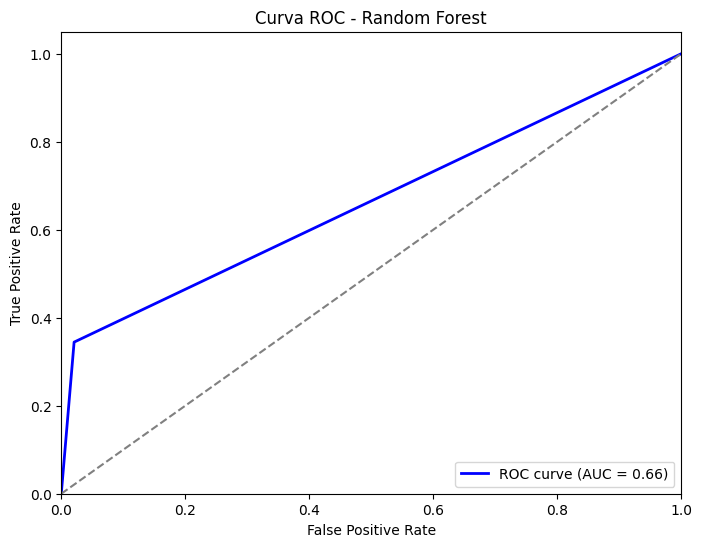

In [26]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()


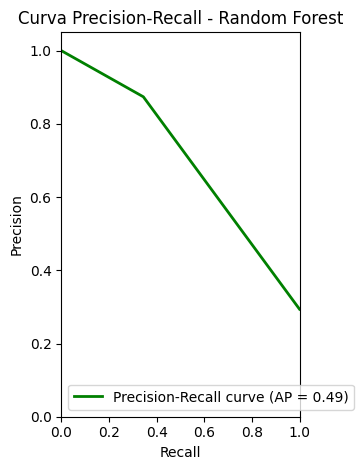

In [27]:


# Calcular la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva Precision-Recall
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, 2ª gráfica
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Random Forest')
plt.legend(loc='lower left')

# Mostrar ambas gráficas
plt.tight_layout()
plt.show()

In [28]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Separar las características y la variable objetivo
X = df_numerico.drop(columns=['Mas_1_coche', 'EDAD_COCHE', 'Tiempo', 'TRANS', 'FORMA_PAGO', 'PROVINCIA', 'Revisiones', 'OcupaciOn', 'Potencia_'])
y = df['Mas_1_coche']

# Dividir las columnas en numéricas y categóricas
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Crear un transformador para las variables categóricas y numéricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),  # Passthrough para columnas numéricas
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # OneHotEncoding para las categóricas
    ])

# Crear un pipeline que incluya el preprocesamiento y el modelo XGBoost
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', XGBClassifier(n_estimators=100, random_state=42, max_depth=5))
])

# División de los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo
pipeline.fit(X_train, y_train)

# Evaluación del modelo
y_pred = pipeline.predict(X_test)

# Calcular la precisión y mostrar la matriz de confusión
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precisión del modelo: {accuracy:.2f}')
print('Matriz de confusión:')
print(conf_matrix)


Precisión del modelo: 0.84
Matriz de confusión:
[[7252  821]
 [ 957 2401]]


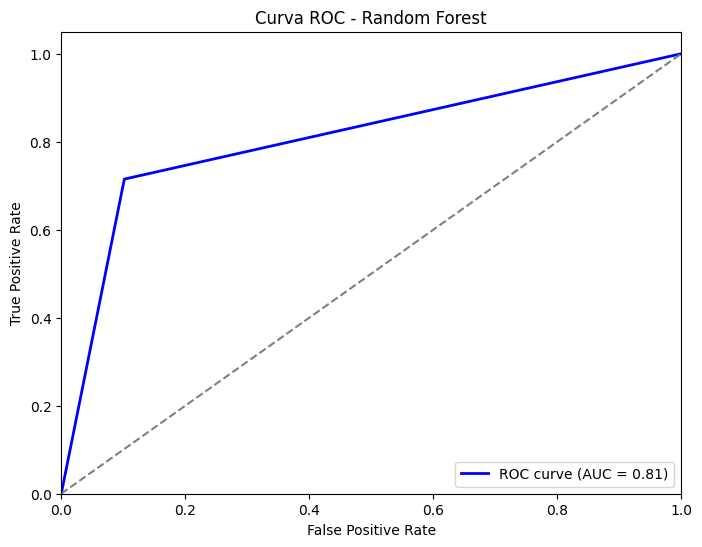

In [29]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Línea de referencia
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Random Forest')
plt.legend(loc='lower right')
plt.show()

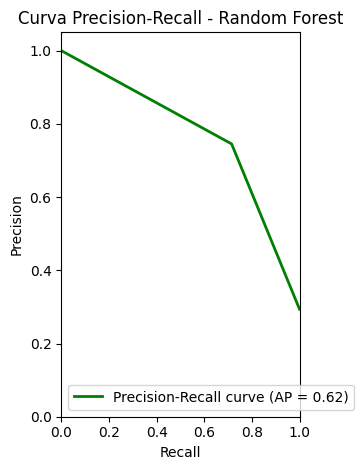

In [30]:


# Calcular la curva Precision-Recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)
average_precision = average_precision_score(y_test, y_pred)

# Calcular la curva ROC y el AUC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Graficar la curva Precision-Recall
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, 2ª gráfica
plt.plot(recall, precision, color='green', lw=2, label=f'Precision-Recall curve (AP = {average_precision:.2f})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Random Forest')
plt.legend(loc='lower left')

# Mostrar ambas gráficas
plt.tight_layout()
plt.show()

In [31]:
from sklearn.model_selection import cross_val_score
import numpy as np

scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# Mostrar los resultados de la validación cruzada
print("Scores de validación cruzada:", scores)
print("Precisión media en validación cruzada: {:.2f}".format(np.mean(scores)))

Scores de validación cruzada: [0.8065786  0.84865716 0.84874464 0.84165865 0.84811899]
Precisión media en validación cruzada: 0.84


In [32]:
predicciones = pd.read_csv("prediccion_coches.csv", delimiter=",")

predicciones.head(5)


,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_coche,Probabilidad_Mas_1_coche
0,CLIN1,A,TIPO1,FUEL 1,1,1,0,0,1,1,...,2,0,2,1,3239,0,2,18,0,0.005576
1,CLIN2,A,TIPO1,FUEL 1,1,1,0,0,0,1,...,2,1,3,0,1541,7187,2,53,0,0.001291
2,CLIN3,A,TIPO1,FUEL 1,1,1,3,0,1,1,...,1,0,3,0,1541,0,4,21,0,0.120072
3,CLIN4,A,TIPO1,FUEL 1,1,1,2,0,0,2,...,0,0,3,0,2036,0,3,21,1,0.992212
4,CLIN5,A,TIPO1,FUEL 1,1,1,2,0,0,1,...,1,1,1,0,2257,11293,2,56,0,0.027085


In [33]:
# Crear tres datasets según los rangos especificados

# Dataset con Probabilidad_Mas_1_coche entre 0 y 0.33
df_0_33 = predicciones[(predicciones['Probabilidad_Mas_1_coche'] > 0) &
                       (predicciones['Probabilidad_Mas_1_coche'] <= 0.33)]

# Dataset con Probabilidad_Mas_1_coche entre 0.33 y 0.66
df_33_66 = predicciones[(predicciones['Probabilidad_Mas_1_coche'] > 0.33) &
                        (predicciones['Probabilidad_Mas_1_coche'] <= 0.66)]

# Dataset con Probabilidad_Mas_1_coche entre 0.66 y 1
df_66_100 = predicciones[(predicciones['Probabilidad_Mas_1_coche'] > 0.66) &
                         (predicciones['Probabilidad_Mas_1_coche'] <= 1)]


In [34]:
df_0_33

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_coche,Probabilidad_Mas_1_coche
0,CLIN1,A,TIPO1,FUEL 1,1,1,0,0,1,1,...,2,0,2,1,3239,0,2,18,0,0.005576
1,CLIN2,A,TIPO1,FUEL 1,1,1,0,0,0,1,...,2,1,3,0,1541,7187,2,53,0,0.001291
2,CLIN3,A,TIPO1,FUEL 1,1,1,3,0,1,1,...,1,0,3,0,1541,0,4,21,0,0.120072
4,CLIN5,A,TIPO1,FUEL 1,1,1,2,0,0,1,...,1,1,1,0,2257,11293,2,56,0,0.027085
5,CLIN6,A,TIPO1,FUEL 1,1,1,2,0,1,1,...,1,0,3,1,2257,0,1,24,0,0.032467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17630,CLIN23217,I,TIPO7,FUEL 1,0,0,2,0,1,1,...,0,0,3,0,2883,0,2,43,0,0.286019
17632,CLIN23220,E,TIPO2,FUEL 1,2,1,2,2,1,1,...,1,0,3,0,1784,19704,4,42,0,0.044081
17633,CLIN23224,E,TIPO2,FUEL 1,2,1,0,0,0,0,...,1,0,3,0,3227,16775,5,46,0,0.085493
17636,CLIN23228,E,TIPO2,FUEL 1,2,1,2,0,1,2,...,2,0,3,0,2461,0,1,52,0,0.047814


In [35]:
df_33_66

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_coche,Probabilidad_Mas_1_coche
7,CLIN8,A,TIPO1,FUEL 1,1,1,0,0,1,1,...,0,1,3,0,1541,12177,1,44,0,0.465516
8,CLIN9,A,TIPO1,FUEL 1,1,1,0,0,1,1,...,0,0,2,1,1541,0,1,21,0,0.498749
10,CLIN11,A,TIPO1,FUEL 1,1,1,0,0,1,1,...,0,1,2,1,3239,10806,1,46,0,0.366744
12,CLIN13,A,TIPO1,FUEL 1,1,1,3,0,0,1,...,2,1,3,0,2905,6684,2,45,0,0.441956
17,CLIN19,A,TIPO1,FUEL 1,1,1,2,3,1,1,...,0,0,3,0,2495,0,1,27,0,0.450267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17605,CLIN23182,I,TIPO7,FUEL 2,2,0,0,0,1,1,...,0,0,3,0,2048,0,1,64,1,0.625532
17609,CLIN23188,I,TIPO7,FUEL 2,0,0,2,0,1,1,...,0,1,2,1,3054,18962,2,38,1,0.546643
17610,CLIN23189,I,TIPO7,FUEL 2,0,0,2,0,0,1,...,0,1,0,0,3265,20718,2,54,1,0.620697
17611,CLIN23190,I,TIPO7,FUEL 2,0,0,0,0,1,2,...,0,1,2,1,2048,9137,3,38,0,0.450501


In [36]:
df_66_100

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia_,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona _Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad Cliente,Mas_1_coche,Probabilidad_Mas_1_coche
3,CLIN4,A,TIPO1,FUEL 1,1,1,2,0,0,2,...,0,0,3,0,2036,0,3,21,1,0.992212
14,CLIN15,A,TIPO1,FUEL 1,1,1,0,0,0,1,...,0,1,1,0,5286,15105,1,49,1,0.966419
16,CLIN18,A,TIPO1,FUEL 1,1,1,3,3,1,1,...,0,1,0,0,5286,11844,2,60,1,0.980759
18,CLIN20,A,TIPO1,FUEL 1,1,1,2,3,0,1,...,1,1,2,1,5854,5865,2,60,1,0.731067
20,CLIN22,A,TIPO1,FUEL 1,1,1,0,0,0,1,...,1,0,0,0,2905,0,1,23,1,0.838821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17627,CLIN23211,I,TIPO7,FUEL 1,0,0,0,0,1,1,...,0,0,3,0,3883,0,1,64,1,0.977951
17628,CLIN23214,I,TIPO7,FUEL 1,0,0,2,0,1,1,...,1,1,3,0,2048,15202,1,55,1,0.924267
17629,CLIN23215,I,TIPO7,FUEL 1,0,0,0,0,1,2,...,0,0,3,1,2048,0,2,44,1,0.814085
17631,CLIN23219,E,TIPO2,FUEL 1,2,1,0,0,0,1,...,0,1,3,0,1784,21219,6,41,1,0.698207


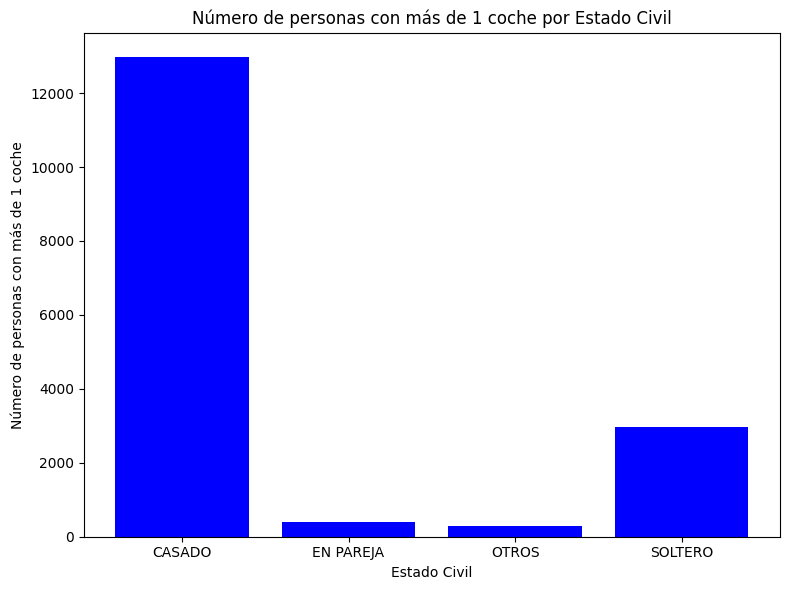

In [37]:

# Agrupar por estado civil y calcular la suma de "Mas_1_coche" para cada grupo
estado_civil_group = df.groupby('ESTADO_CIVIL')['Mas_1_coche'].sum().reset_index()

# Graficar el número de personas con más de 1 coche según el estado civil
plt.figure(figsize=(8, 6))
plt.bar(estado_civil_group['ESTADO_CIVIL'], estado_civil_group['Mas_1_coche'], color=['blue'])
plt.title('Número de personas con más de 1 coche por Estado Civil')
plt.xlabel('Estado Civil')
plt.ylabel('Número de personas con más de 1 coche')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

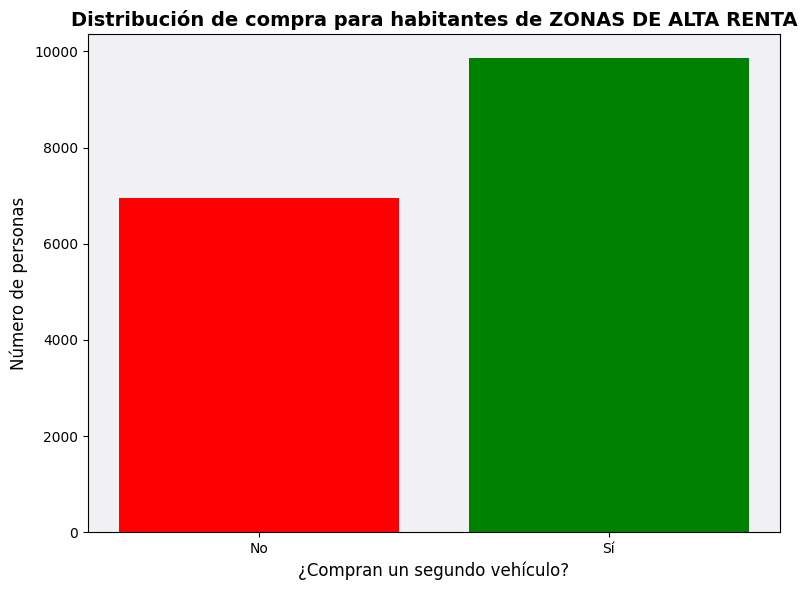

In [38]:
# Agrupar por "Mas_1_coche" y contar para los "CASADO"
df_grouped = df[df['Zona _Renta'] == 'Alto'].groupby('Mas_1_coche').size().reset_index(name='count')

# Graficar el número de personas con "Mas_1_coche" igual a 0 y 1 para la zona de alta renta
plt.figure(figsize=(8, 6))
plt.bar(df_grouped['Mas_1_coche'], df_grouped['count'], color=['red', 'green'])

# Cambiar el fondo del gráfico
plt.gca().set_facecolor('#f0f0f5')  # Fondo ligeramente gris con un toque visual
plt.title('Distribución de compra para habitantes de ZONAS DE ALTA RENTA', fontsize=14, fontweight='bold')
plt.xlabel('¿Compran un segundo vehículo?', fontsize=12)
plt.ylabel('Número de personas', fontsize=12)
plt.xticks([0, 1], ['No', 'Sí'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()

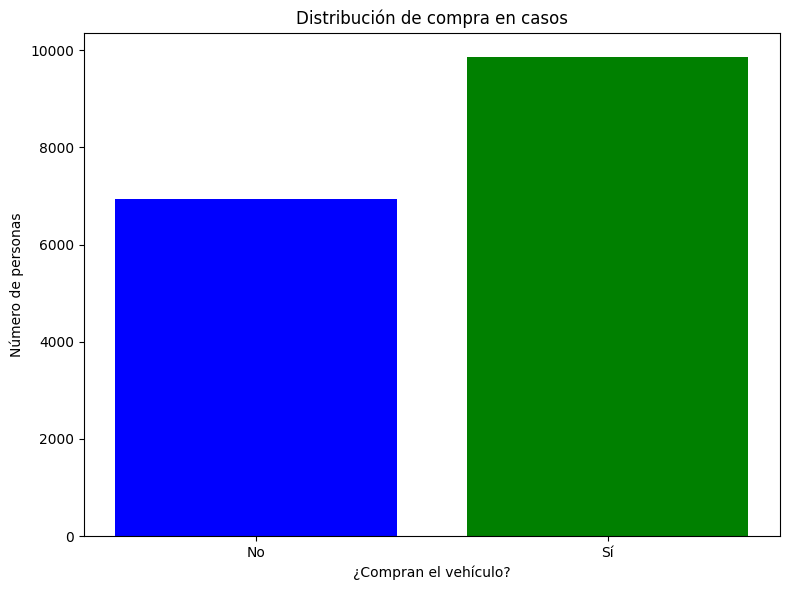

In [39]:
# Agrupar por "Mas_1_coche" y contar para los "CASADO"
df_grouped = df[df['Zona _Renta'] == 'Alto'].groupby('Mas_1_coche').size().reset_index(name='count')

# Graficar el número de personas con "Mas_1_coche" igual a 0 y 1 para el estado civil "CASADO"
plt.figure(figsize=(8, 6))
plt.bar(df_grouped['Mas_1_coche'], df_grouped['count'], color=['blue', 'green'])
plt.title('Distribución de compra en casos')
plt.xlabel('¿Compran el vehículo?')
plt.ylabel('Número de personas')
plt.xticks([0, 1], ['No', 'Sí'])

# Mostrar el gráfico
plt.tight_layout()
plt.show()